In [1]:
from experiment import PavlovTiming
from model import ValueRNN
from train import make_dataloader, train_model, probe_model
from plotting import plot_trials, plot_loss, plot_predictions, plot_hidden_activity

### Create Experiment

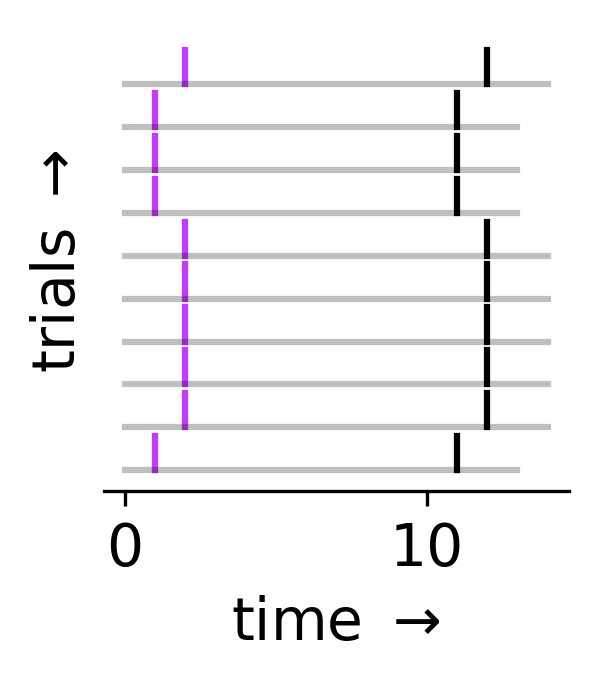

In [2]:
E = PavlovTiming(ncues=1)
plot_trials(E.trials[:10])

### Create Model

In [3]:
hidden_size = 2 # number of hidden neurons
gamma = 0.5     # discount rate
model = ValueRNN(input_size=E.ncues + int(E.include_reward),
                 output_size=7,
                 hidden_size=hidden_size, 
                 gamma=gamma)
print('model # parameters: {}'.format(model.n_parameters()))

model # parameters: 48


### Training Model

Epoch 0, 0.1241
Epoch 200, 0.1073
Epoch 400, 0.1067
Epoch 600, 0.1064
Epoch 800, 0.1063
Epoch 1000, 0.1063
Epoch 1200, 0.1063
Epoch 1400, 0.1063
Epoch 1600, 0.1063
Epoch 1800, 0.1063
Epoch 2000, 0.1063
Epoch 2200, 0.1063
Epoch 2400, 0.1063
Epoch 2600, 0.1063
Epoch 2800, 0.1063
Epoch 3000, 0.1063
Epoch 3200, 0.1063
Epoch 3400, 0.1063
Epoch 3600, 0.1063
Epoch 3800, 0.1063
Epoch 4000, 0.1063
Epoch 4200, 0.1063
Epoch 4400, 0.1063
Epoch 4600, 0.1063
Epoch 4800, 0.1063
Epoch 5000, 0.1063
Epoch 5200, 0.1063
Epoch 5400, 0.1063
Epoch 5600, 0.1063
Epoch 5800, 0.1063
Epoch 6000, 0.1063
Epoch 6200, 0.1063
Epoch 6400, 0.1063
Epoch 6600, 0.1063
Epoch 6800, 0.1063
Done! Best loss: 0.10625209785066544


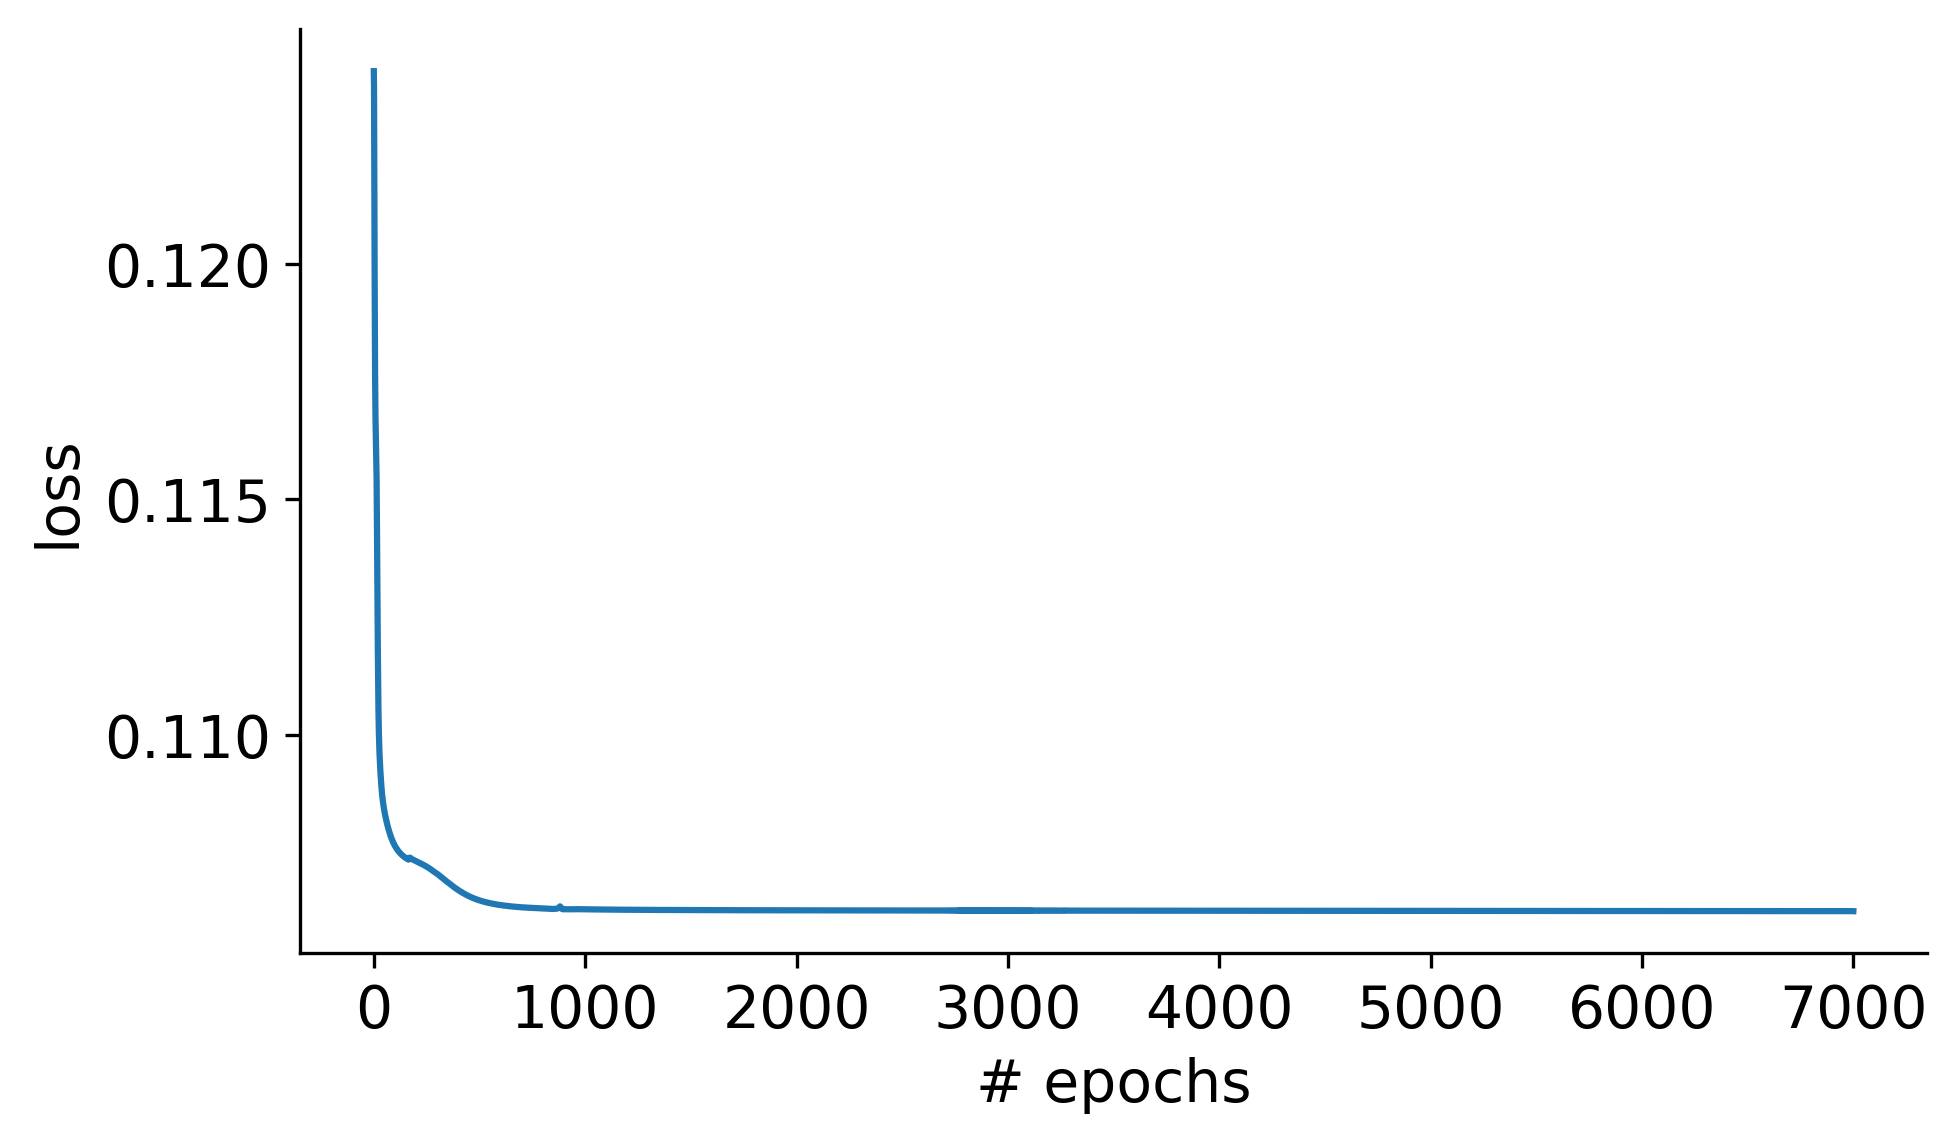

In [4]:
lr = 0.01
batch_size = 12
dataloader = make_dataloader(E, batch_size=batch_size)
scores = train_model(model, dataloader, lr=lr, epochs=7000, print_every=200)
plot_loss(scores)

### Plotting predicted and actual values

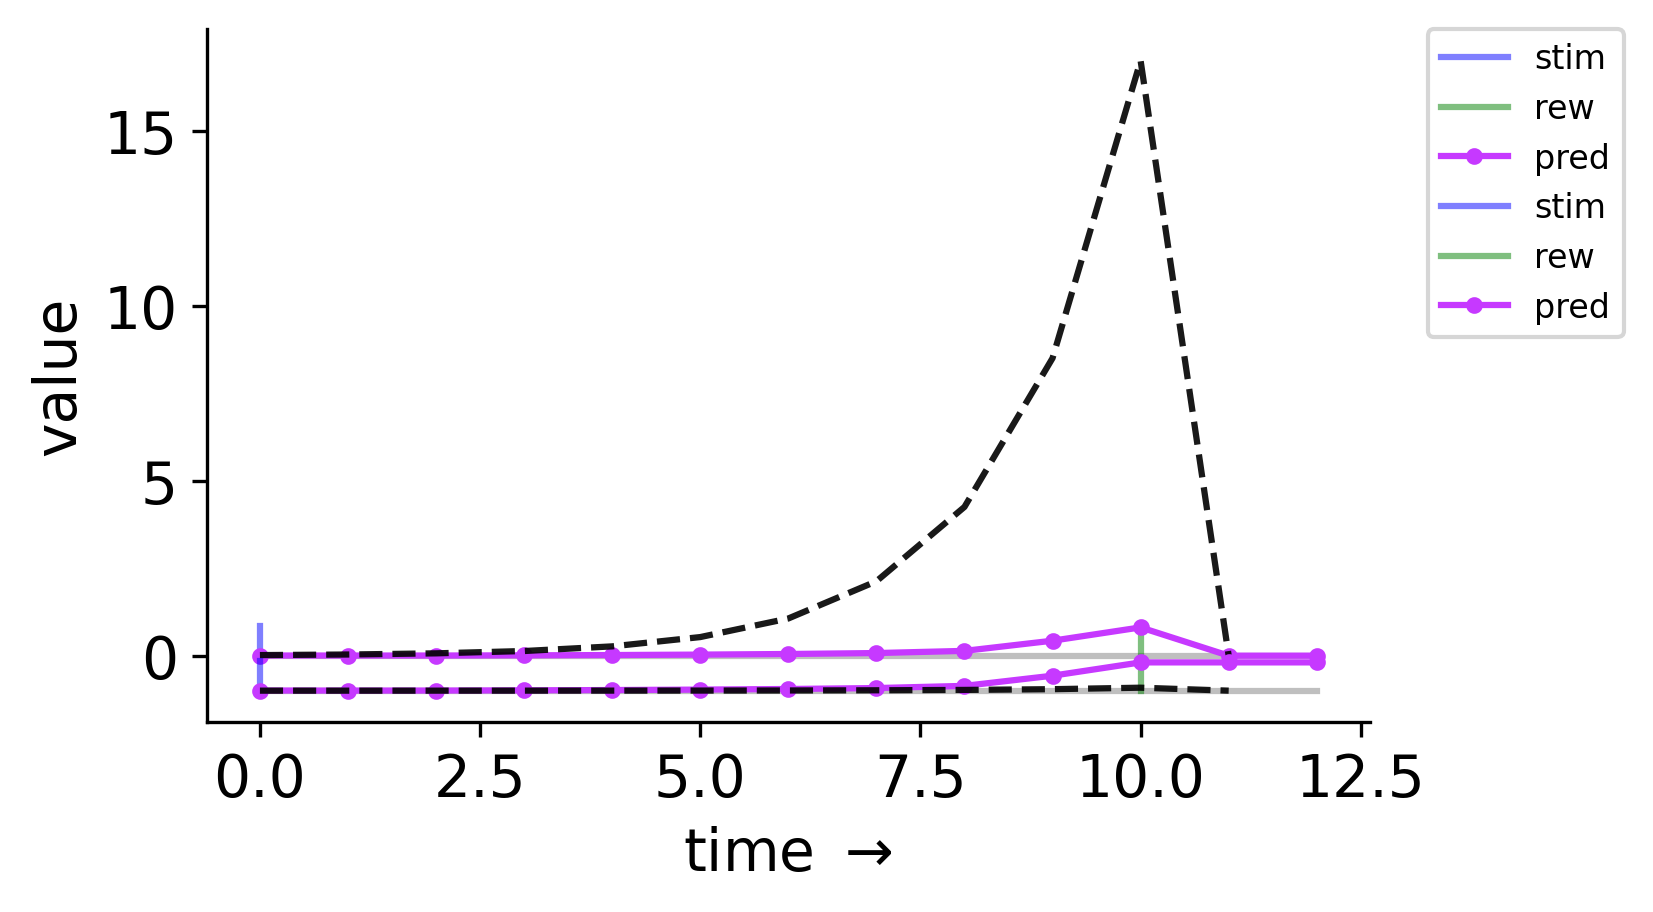

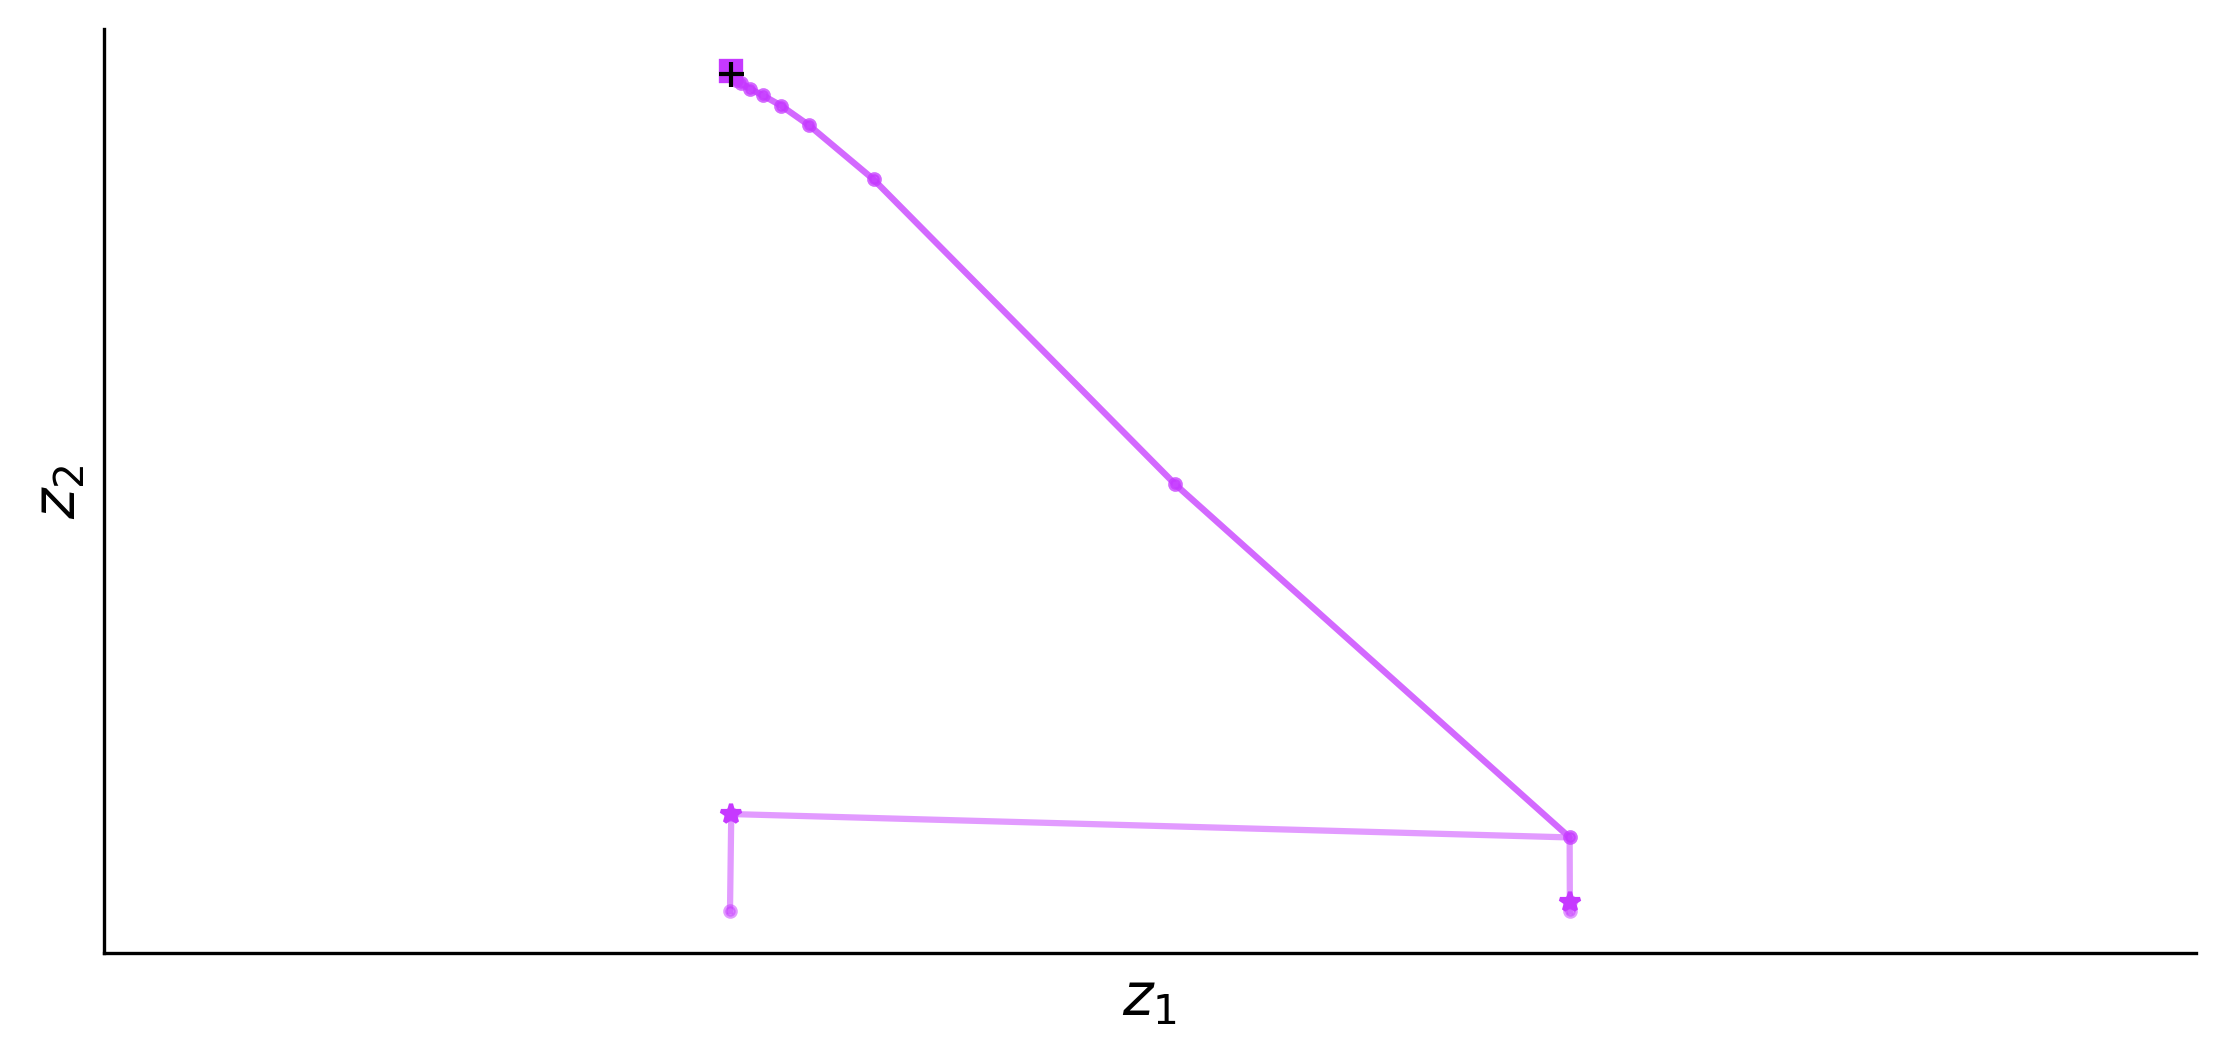

In [5]:
responses = probe_model(model, dataloader)
plot_predictions(responses[:2], 'value', gamma=model.gamma)
plot_hidden_activity(responses[:2])